In [1]:
from wordcloud import WordCloud
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [2]:
page = requests.get('https://www.rev.com/blog/transcripts/donald-trump-joe-biden-1st-presidential-debate-transcript-2020')
assert page.status_code == 200

In [3]:
soup = BeautifulSoup(page.content, 'html.parser')

In [4]:
#print(soup.prettify())
#[type(item) for item in list(soup.children)]

In [5]:
section = soup.find_all('div', class_='fl-callout-text')[0]
statement_ps = section.select('p')
statement_raw_list = [ statement.text for statement in statement_ps ]

In [6]:
#statement_raw_list[0].split('\n')

In [7]:
def parts(item):
    p = item.split('\n')
    if len(p) == 2:
        return p[0], p[1]
    else:
        print(f"The item {item} does not have 2 parts!")
        return None, None

name_comment_list = []
for statement_raw_item in statement_raw_list:
    name, comment = parts(statement_raw_item)
    name_comment_list.append({'name': name, 'comment': comment})

The item   does not have 2 parts!


In [8]:
#name_comment_list[0]

In [9]:
df = pd.DataFrame(name_comment_list)
#df.info()

In [10]:
df.dropna(inplace=True)

In [11]:
moderator = df[df.name.str.contains('Wallace')]
trump = df[df.name.str.contains('Trump')]
biden = df[df.name.str.contains('Biden')]

In [12]:
#biden

In [13]:
moderator_words = ' '.join(moderator['comment'])
trump_words = ' '.join(trump['comment'])
biden_words = ' '.join(biden['comment'])

In [14]:
nltk.download('punkt')
from nltk.tokenize import RegexpTokenizer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\john_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
tokenizer = RegexpTokenizer(r'\w+')
moderator_tokens = tokenizer.tokenize(moderator_words)
trump_tokens = tokenizer.tokenize(trump_words)
biden_tokens = tokenizer.tokenize(biden_words)

In [16]:
def make_wordcloud(tokens):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", colormap="Paired").generate(' '.join(tokens))

    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

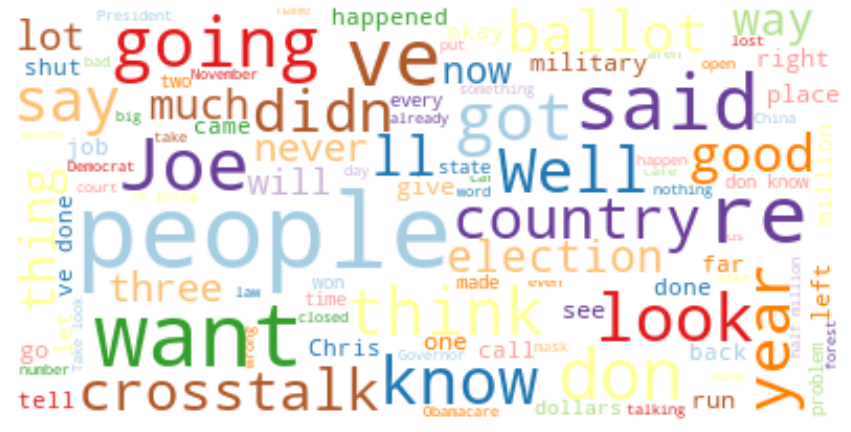

In [17]:
make_wordcloud(trump_tokens)

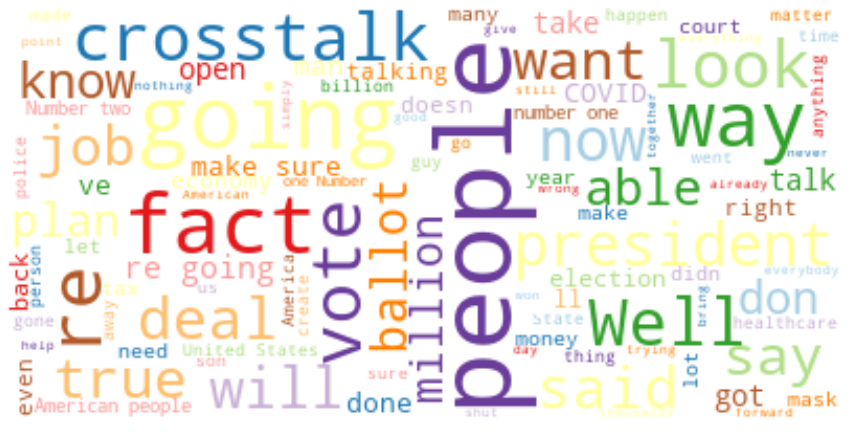

In [18]:
make_wordcloud(biden_tokens)

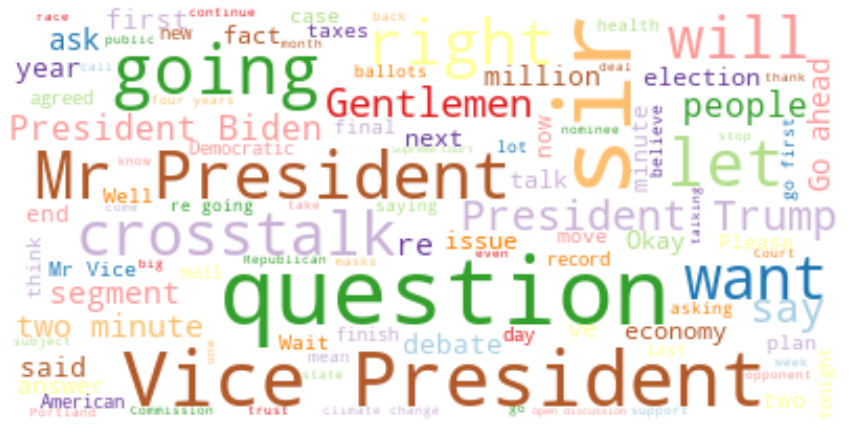

In [19]:
make_wordcloud(moderator_tokens)